# Working With Dates in Pandas

What is it?
- this is focusing on all the ways we can manipulate dates in pandas

Why do we care?
- being able to manipulate dates will allow us to prepare the data to analyze trends over time

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Create your own date

#### using pandas

In [4]:
#with Timestamp()
date = pd.Timestamp(month=3, day=12, year=2020)

In [5]:
type(date)

pandas._libs.tslibs.timestamps.Timestamp

#### using datetime module from datetime library

In [6]:
#import
from datetime import datetime

In [8]:
#with datetime()
date = datetime(month=3, day=12, year=2020)

In [9]:
#datatype
type(date)

datetime.datetime

#### calculate now (using datetime module)

In [12]:
today = datetime.now()

In [13]:
#datatype
type(today)

datetime.datetime

## Add/subtract dates

#### subtract two dates

In [14]:
today

datetime.datetime(2023, 5, 31, 10, 32, 32, 249297)

In [15]:
date

datetime.datetime(2020, 3, 12, 0, 0)

In [19]:
today - date

datetime.timedelta(days=1175, seconds=37952, microseconds=249297)

#### use Timedelta to alter a date

In [17]:
today

datetime.datetime(2023, 5, 31, 10, 32, 32, 249297)

In [21]:
today + pd.Timedelta(days=4)

datetime.datetime(2023, 6, 4, 10, 32, 32, 249297)

In [22]:
today - pd.Timedelta(days=4)

datetime.datetime(2023, 5, 27, 10, 32, 32, 249297)

## Transform to date format

### One date

In [23]:
date = 'Jan 1 1970'

In [24]:
#datatype
type(date)

str

In [26]:
#use pd.to_datetime() to convert
date = pd.to_datetime(date)
date

Timestamp('1970-01-01 00:00:00')

In [27]:
#datatype
type(date)

pandas._libs.tslibs.timestamps.Timestamp

### One date, but confuse pandas

In [28]:
date = 'Jan:7:1970'

In [29]:
#datatype
type(date)

str

In [31]:
#use pd.to_datetime() to convert
# pd.to_datetime(date)

We can fix this error using the `format` argument.

For info on formatting: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [38]:
#use format arguement
date = pd.to_datetime(date, format='%b:%d:%Y')

#### using `strftime` to reformat date to more readable version
- can think of it as a "string format time"

In [41]:
date = date.strftime('%d/%m/%y')

In [44]:
#datatype
type(date)

str

### Now a whole columns of dates

Data: the amount of coffee consumed per day

In [45]:
url = "https://gist.githubusercontent.com/ryanorsinger/\
b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)

In [52]:
#look at data
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [57]:
#datatypes
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [50]:
#use pd.to_datetime() to convert
pd.to_datetime(df.date)

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [54]:
#can also use .astype() to convert
df.date = df.date.astype('datetime64')
df.date

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

<div class="alert alert-block alert-info"> <b>NOTE:</b> use pd.to_datetime when you have weird dates, so you can use the format argument </div>

In [55]:
#datatypes
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## Now that they are in a date format, let's manipulate them

In [56]:
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


### extract pieces of the date

<div class="alert alert-block alert-info"> <b>NOTE:</b> use <code>.dt</code> when using datetime methods/attributes on a series (just like using <code>.str</code>when using string functions) </div>

the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [59]:
# extract only year
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [61]:
# extract only day of week
df.date.dt.day_of_week

0      1
1      2
2      3
3      4
4      0
      ..
256    2
257    3
258    4
259    0
260    1
Name: date, Length: 261, dtype: int64

### add them back to our initial dataframe

In [62]:
#add them all
df['year'] =df.date.dt.year
df['day'] =df.date.dt.day
df['day_of_week'] =df.date.dt.day_of_week

In [63]:
df.head()

,date,coffee_consumption,year,day,day_of_week
0,2019-01-01,14.301915,2019,1,1
1,2019-01-02,12.905900,2019,2,2
2,2019-01-03,10.046015,2019,3,3
3,2019-01-04,6.354805,2019,4,4
4,2019-01-07,8.545563,2019,7,0


### reformat date using `strftime()`

In [64]:
df.date.dt.strftime('%m/%d/%Y')

0      01/01/2019
1      01/02/2019
2      01/03/2019
3      01/04/2019
4      01/07/2019
          ...    
256    12/25/2019
257    12/26/2019
258    12/27/2019
259    12/30/2019
260    12/31/2019
Name: date, Length: 261, dtype: object

In [66]:
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
year                           int64
day                            int64
day_of_week                    int64
dtype: object

## Mini exercise 

1. import the datetime module from the datetime library
2. convert the date column to a datetime
3. subtract one day from each date
4. reformat the dates as "Sun - March 26, 2022"


In [98]:
url = 'https://gist.githubusercontent.com/misty-garcia/\
8c099128d3f59c32afaa5aa2c3e4fb62/raw/2a4c06ea955266e276a78af5d2e1083cfd348703/mockdates'

df = pd.read_csv(url,sep='\t')


In [99]:
df.head()

,date
0,Mar - 27 - 2022
1,May - 22 - 2022
2,May - 16 - 2022
3,Aug - 22 - 2022
4,Mar - 15 - 2022


In [100]:
df['date'] = pd.to_datetime(df.date)
df.dtypes

date    datetime64[ns]
dtype: object

In [101]:
df['minus_1_day'] = df.date - pd.Timedelta(days=1)
df

,date,minus_1_day
0,2022-03-27,2022-03-26
1,2022-05-22,2022-05-21
2,2022-05-16,2022-05-15
3,2022-08-22,2022-08-21
4,2022-03-15,2022-03-14
...,...,...
95,2022-01-04,2022-01-03
96,2022-03-24,2022-03-23
97,2022-08-28,2022-08-27
98,2022-01-31,2022-01-30


In [102]:
# reformat day -- "Sun - March 26, 2022"
df['new_format']=df.minus_1_day.dt.strftime('%a - %B %-d,%Y')
df

,date,minus_1_day,new_format
0,2022-03-27,2022-03-26,"Sat - March 26,2022"
1,2022-05-22,2022-05-21,"Sat - May 21,2022"
2,2022-05-16,2022-05-15,"Sun - May 15,2022"
3,2022-08-22,2022-08-21,"Sun - August 21,2022"
4,2022-03-15,2022-03-14,"Mon - March 14,2022"
...,...,...,...
95,2022-01-04,2022-01-03,"Mon - January 3,2022"
96,2022-03-24,2022-03-23,"Wed - March 23,2022"
97,2022-08-28,2022-08-27,"Sat - August 27,2022"
98,2022-01-31,2022-01-30,"Sun - January 30,2022"


## Time to make it more complex!

Scenario: We're looking at cryptocurrency close value and volume over time. 

In [104]:
#save url
sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

#read in df
df = pd.read_csv(csv_export_url)

Date       object
Symbol     object
Close     float64
Volume    float64
dtype: object

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    23674 non-null  object 
 1   symbol  23674 non-null  object 
 2   close   23674 non-null  float64
 3   volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [ ]:
#lowercase columns
df.columns = df.columns.str.lower()

#### let's plot the our close value

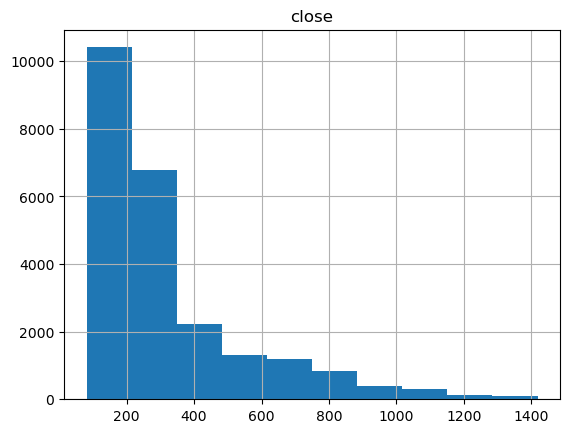

In [111]:
#distribution
df.close.hist()
plt.title('close')
plt.show()

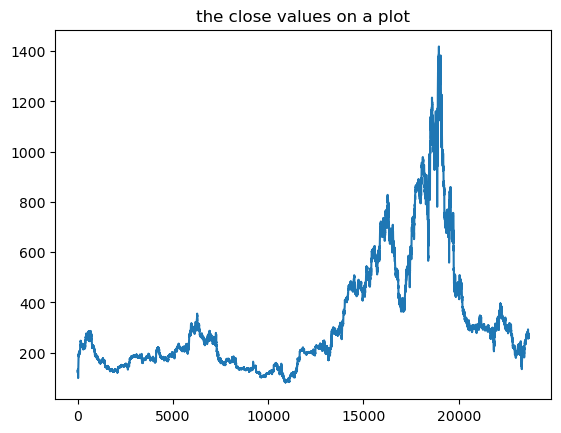

In [113]:
#line plot
df.close.plot()
plt.title('the close values on a plot')
plt.show()

<div class="alert alert-block alert-info"> 
    
<b>NOTE:</b> when we plot a single series using .plot(), the x-axis is the index value 

</div> 
 
 

## How do we make pandas time aware?

1. Convert 'date' column to datetime object
2. Set the datetime column as index
3. Sort the datetime index

### 1. Convert 'date' column to datetime object

In [117]:
df.head()

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


In [118]:
# df.date.astype('datetime64')

Reminder: format argument allows us to tell pandas the makeup of our date, so it can be understood

In [120]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')

In [121]:
df.dtypes

date      datetime64[ns]
symbol            object
close            float64
volume           float64
dtype: object

In [122]:
df.head()

,date,symbol,close,volume
0,2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
1,2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2,2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
3,2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
4,2020-03-13 09:00:00,ETHUSD,124.08,2767584.44


### 2. Set the datetime column as index

In [124]:
df = df.set_index('date')
df.head()

,symbol,close,volume
date,,,
2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
2020-03-13 09:00:00,ETHUSD,124.08,2767584.44


### 3. Sort the datetime index

In [126]:
df = df.sort_index()
df.head()

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


#### Now let's plot it again!

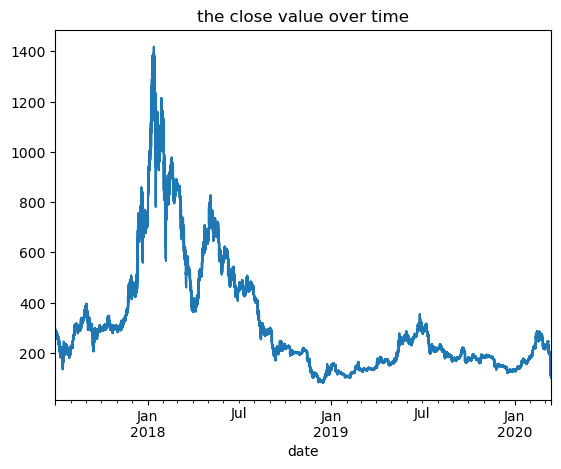

In [127]:
#line plot

df.close.plot()

plt.title('the close value over time')
plt.show()

Q: Why is the graph different now?

## Let's look at the the mean close value on each day of the week

<div class="alert alert-block alert-info"> <b>NOTE:</b> when the datetime is an index, we don't use <code>.dt</code> to use datetime methods/attributes</div>

In [144]:
#pull out weekday name & save
df['weekday'] = df.index.day_name()

#### let's plot it!

In [155]:
# plt.figure(figsize=(10,6))

# # df.groupby('weekday').mean().sort_values()

# plt.title('the mean close value each day of the week')
# plt.show()

### I don't like that the days aren't in order

In [149]:
#use dayofweek attribute
df['dayofweek'] = df.index.dayofweek
df

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday,4
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday,4
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday,4


#### let's plot it better this time!

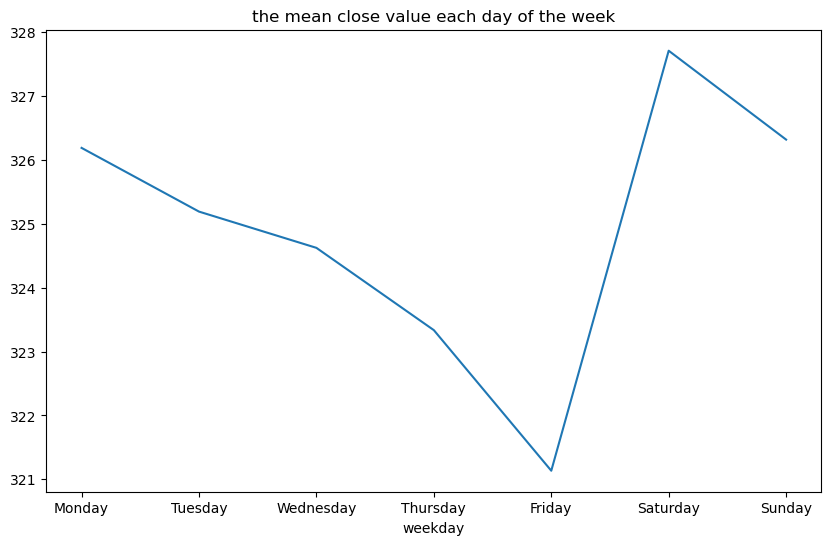

In [147]:
plt.figure(figsize=(10,6))
df.groupby('weekday').mean().sort_values('dayofweek').close.plot()

plt.title('the mean close value each day of the week')
plt.show()

## How do we get a subset of the dataframe?

`.loc` vs `.iloc`

- loc subsets based on NAME
- iloc subsets based on POSITION

Why is this helpful?
- we can use `.loc` to name a date or range of dates to subset our df

In [156]:
#single .loc value
df.loc['2017-07-01 12:00:00']

symbol          ETHUSD
close           263.12
volume       824362.87
weekday       Saturday
dayofweek            5
Name: 2017-07-01 12:00:00, dtype: object

In [159]:
df.loc['2017-07']

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2017-07-31 19:00:00,ETHUSD,194.56,1625092.78,Monday,0
2017-07-31 20:00:00,ETHUSD,194.43,1337140.19,Monday,0
2017-07-31 21:00:00,ETHUSD,196.91,1850976.27,Monday,0


In [160]:
#range of .loc values 
df.loc['2017-07': '2017-09']

,symbol,close,volume,weekday,dayofweek
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2017-09-30 19:00:00,ETHUSD,302.79,301850.54,Saturday,5
2017-09-30 20:00:00,ETHUSD,302.97,737006.90,Saturday,5
2017-09-30 21:00:00,ETHUSD,300.10,1407368.63,Saturday,5


## What if we want a different period of data?
- downsampling
- upsampling
- resampling
- rolling averages
- shift/difference

In [192]:
#drop extra columns
df = df[['close']]
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


### Downsampling: reduce frequency

reduce the number of rows by removing more precise units of time
- use `asfreq` to change the period

#### Example: the level of granularity of our data is currently to the hour

In [193]:
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


#### reduce granularity

In [194]:
#set frequency to daily
df.asfreq('D').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-02 11:00:00,282.30
2017-07-03 11:00:00,279.50
2017-07-04 11:00:00,269.57
2017-07-05 11:00:00,265.20


In [195]:
#set frequency to monthly
df.asfreq('M').head()

,close
date,
2017-07-31 11:00:00,199.96
2017-08-31 11:00:00,388.19
2017-09-30 11:00:00,300.37
2017-10-31 11:00:00,303.45
2017-11-30 11:00:00,420.42


### Upsampling: Increase frequency
increase the number of rows by adding more precise units of time
- use `asfreq` to change the period (same as before)

#### Example: the level of granularity of our data is currently to the hour

In [196]:
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


#### increase granularity

In [172]:
#set frequency to minutes
df.asfreq('30T').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,NaN
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,NaN
2017-07-01 13:00:00,275.01


#### fill the nulls that were generated

'ffill' = forward fill

'bfill' = backward fill

In [174]:
#use ffill method
df.asfreq('30T', method='ffill').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,263.12
2017-07-01 13:00:00,275.01


In [175]:
# use bfill method
df.asfreq('30T', method='bfill').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,263.12
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,275.01
2017-07-01 13:00:00,275.01


> just fill in the nulls

### Resampling - Aggregating over time
select a level of granularity and get an aggregated value from it

In [176]:
df.head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 13:00:00,275.01
2017-07-01 14:00:00,274.83
2017-07-01 15:00:00,268.79


In [213]:
#get the daily mean
df_daily = df.resample('D').mean()

In [214]:
#get mean, min, max
df.resample('D').agg(['mean', 'min', 'max']).head()

close                
                  mean     min     max
date                                  
2017-07-01  265.284615  257.13  275.01
2017-07-02  269.782500  256.81  292.54
2017-07-03  278.882083  274.89  282.36
2017-07-04  276.743333  268.95  282.58
2017-07-05  265.025833  255.42  271.00

#### let's plot it!

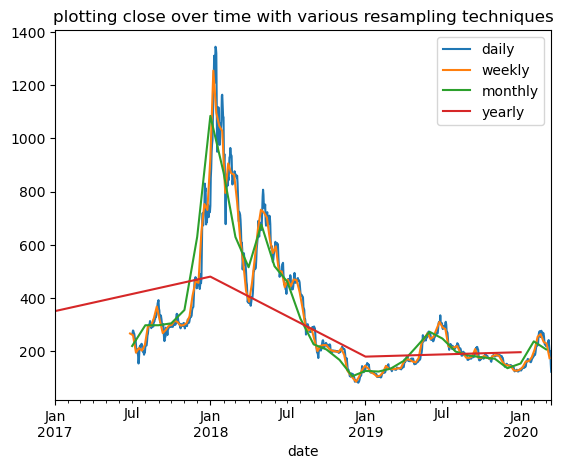

In [215]:
# plt.figure(figsize=(14,10))

df_daily.close.plot(label='daily')
df_daily.resample('W').mean().close.plot(label='weekly')
df_daily.resample('M').mean().close.plot(label='monthly')
df_daily.resample('Y').mean().close.plot(label='yearly')


plt.title('plotting close over time with various resampling techniques')
plt.legend()
plt.show()

### Rolling averages

used to smooth out short-term fluctuations in time series data and highlight long-term trends
- use `rolling()` to calculate

In [202]:
df_daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [190]:
#use the rolling function
df_daily.rolling(5).mean().head(10)

close                  
                  mean      min      max
date                                    
2017-07-01         NaN      NaN      NaN
2017-07-02         NaN      NaN      NaN
2017-07-03         NaN      NaN      NaN
2017-07-04         NaN      NaN      NaN
2017-07-05  271.143673  262.640  280.698
2017-07-06  271.382750  263.654  280.696
2017-07-07  268.214667  259.690  275.430
2017-07-08  260.747833  251.402  268.302
2017-07-09  254.361833  245.374  261.722
2017-07-10  246.440417  234.862  255.216

> the rolling average is the previous number of units averaged together  
> in this example, the rolling average on 2017-07-05 is the average of 2017-07-01 - 2017-07-05

#### let's plot it!

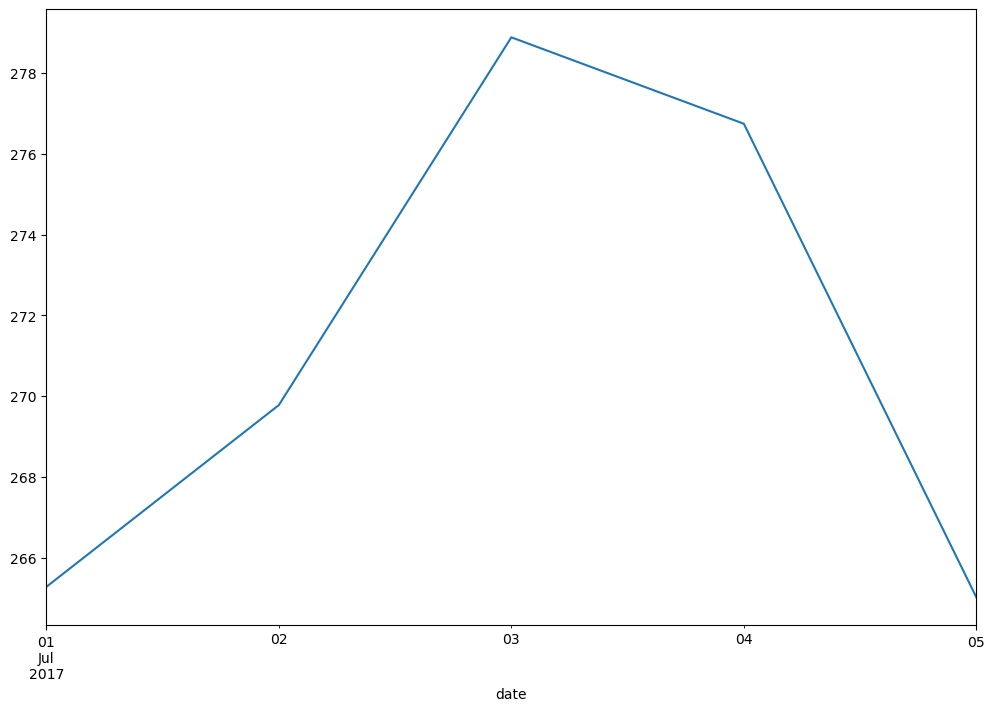

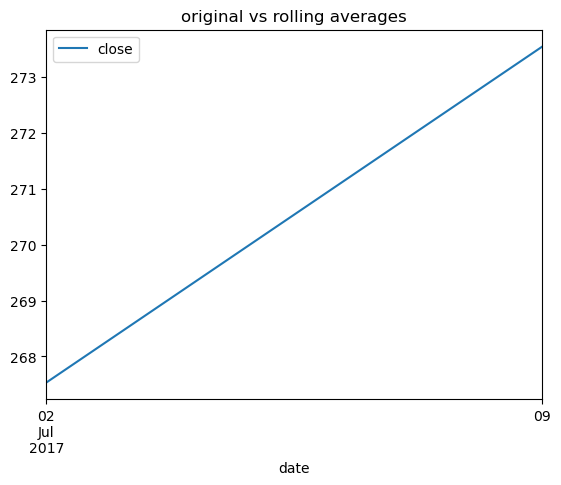

In [201]:
plt.figure(figsize=(12,8))

# original granularity
df_daily.close.plot(label='original')

# resample by week and look at 4 weeks 
df_daily.resample('W').mean().plot(label='original')
# resample by week and look at 12 weeks 

plt.legend()
plt.title('original vs rolling averages')
plt.show()

### How about Lagging or Leading the data?

* `.shift`: move the data backwards and forwards by a given amount
* `.diff`: find the difference with the previous observation (or a specified further back observation)

In [204]:
df_daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [203]:
#shift by one
df_daily.shift(1)

,close
date,
2017-07-01,NaN
2017-07-02,265.284615
2017-07-03,269.782500
2017-07-04,278.882083
2017-07-05,276.743333


In [205]:
#shift by negative 1
df_daily.shift(-1)

,close
date,
2017-07-01,269.782500
2017-07-02,278.882083
2017-07-03,276.743333
2017-07-04,265.025833
2017-07-05,NaN


In [209]:
#difference by one
df_daily['diff'] = df_daily.close.diff(1)
df_daily.head()

,close,diff
date,,
2017-07-01,265.284615,NaN
2017-07-02,269.782500,4.497885
2017-07-03,278.882083,9.099583
2017-07-04,276.743333,-2.138750
2017-07-05,265.025833,-11.717500


# Recap

- use `datetime.datetime` module
- to cast as a date
    - `.astype('datetime64')`
    - `pd.to_datetime()`
        - can use `format` argument for funky dates
- strftime notation
    - https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
- attritubes and methods
    - https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
- to make pandas time aware
    1. Convert 'date' column to datetime object
    2. Set the datetime column as index
    3. Sort the datetime index
- sampling methods
    - downsampling/ upsampling
        - `.asfreq()` 
        - fill nulls
            - `.ffill`/`.bfill`
    - resampling
        - `.resample()`
    - rolling average
        - `.rolling()`
        
    